In [2]:
using PyPlot

INFO: Loading help data...


### Ejercicio 1: Relaciones de recurrencia

Así como se hizo en clase para la exponencial, el logaritmo, y las potencias; obtén las series de recurrencia para las siguientes funciones:

* Seno.
* Coseno.
* Tangente.
* Cotangente.

¿Hay algún problema al intentar calcular la cotangente? Si la respuesta es sí ¿cuál?, si la respuesta es no ¿por qué?

Utilizaré las siguentes fórmulas para obtener las relaciones solicitadas

$$
\sin{g(x)} = \sum_{k=0}^{\infty} (\sin{g})_k (x-x_0)^k
$$

$$
\frac{d \sin{g(x)}}{d x}=\cos{g(x)}\cdot g'(x) = \sum_{k=1}^{\infty} k \cdot (\sin{g})_k (x-x_0)^{k-1}
$$

$$
\cos{g(x)}=\sum_{k=0}^\infty (\cos{g})_k (x-x_0)^k
$$

$$
\frac{d \cos{g(x)}}{d x}=-\sin{g(x)}\cdot g'(x) = \sum_{k=1}^{\infty} k \cdot (\cos{g})_k (x-x_0)^{k-1}
$$


$$
g'(x)=\sum_{k=1}^\infty k g_k (x-x_0)^{k-1}
$$

y la fórmula que se había obtenido en clase para el producto

$$
g'(x)=\sum_{k=1}^\infty k g_k (x-x_0)^{k-1}
$$

para el seno entonces se tiene que sustituyendo donde corresponde para las expresiones de su derivada.

$$
\sum_{k=1}^\infty k\cdot(\sin{g})_k \cdot (x-x_0)^{k-1} = \sum_{k=0}^\infty (\cos{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k-1}
$$

Multiplicando a ambos lado por $(x-x_0)$

$$
\sum_{k=1}^\infty k\cdot(\sin{g})_k \cdot (x-x_0)^{k} = \sum_{k=0}^\infty (\cos{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k}
$$

Por la regla del producto, si $k > 0$

$$
k(\sin{g})_k = \sum_{i=1}^k i\cdot g_k (\cos{g})_{k-i}
$$

con lo que 

$$
(\sin{g})_k = \begin{cases} \sin{g_0} &\mbox{if } k = 0 \\
 \frac{1}{k}\sum_{i=1}^k i\cdot g_k (\cos{g})_{k-i} & \mbox{if } k > 0 \end{cases} 
 $$
 
para el coseno se hace algo análogo, sustituyendo donde corresponde para las expresiones de su derivada.

$$
\sum_{k=1}^\infty k\cdot(\cos{g})_k \cdot (x-x_0)^{k-1} = -\sum_{k=0}^\infty (\sin{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k-1}
$$

y se multiplica a ambos lados por $(x-x_0)$

$$
\sum_{k=1}^\infty k\cdot(\cos{g})_k \cdot (x-x_0)^{k} = -\sum_{k=0}^\infty (\sin{g})_k \cdot (x-x_0)^k \sum_{k=1}^\infty k\cdot (g)_k \cdot (x-x_0)^{k}
$$

Por la regla del producto, si $k > 0$

$$
k(\cos{g})_k = -\sum_{i=1}^k i\cdot g_k (\sin{g})_{k-i}
$$

con lo que 

$$
(\cos{g})_k = \begin{cases} \cos{g_0} &\mbox{if } k = 0 \\
 -\frac{1}{k}\sum_{i=1}^k i\cdot g_k (\sin{g})_{k-i} & \mbox{if } k > 0 \end{cases} 
 $$

### Ejercicio 2: Integración con Runge–Kutta

Utilizando el método de [Runge–Kutta de cuarto orden](http://www.ctcms.nist.gov/~langer/oof2man/RegisteredClass-RK4.html) haz lo siguiente:

* Integra la siguiente ecuación diferencial,

$$ \dot{x} = x^2, \qquad x(0) = 1.$$ 

* Compara tu solución contra la solución analítica en una gráfica.
* Muestra cómo se comporta el error.

Reciclo código que ya tenía hecho hace ya un año, en la clase del profesor Sanders, en aquella ocasión se nos pidió programar los métodos de integración de Euler, Euler-Cromer, punto medio y Runge-Kuta-4. Lo que hice primero fue declarar cada uno de los métodos y luego llamar una función integradora tal que integrara una función dependiendo del método empleado. Lo mejor es que me dará oportunidad de comparar cada uno de los métodos con la integración de Taylor.

In [3]:
#En todos los casos:
# ti = tiempo inicial
# q0 = posición inicial
# v0 = velocidad inicial
# fq = dx/dt  #Función para la posición
# fv = dv/dt = d^2 t / dt^2 #Función para la velocidad
# h = tamaño del paso

function euler(ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*fq(ti,q0,v0)
    q_nueva , v_nueva
end

function eulercromer (ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*fq(ti+h,q0,v_nueva)
    q_nueva , v_nueva
end

function puntomedio(ti,q0,v0,fq,fv,h)
    v_nueva = v0 + h*fv(ti,q0,v0)
    q_nueva = q0 + h*0.5*(v_nueva + v0)
    q_nueva , v_nueva
end 

function rk4(ti,q0,v0,fq,fv,h)
        f1v = fv(ti,q0,v0)
        f1q = fq(ti,q0,v0)
        
        f2v = fv(ti+0.5*h,q0+0.5*h*f1q,v0+0.5*h*f1v)
        f2q = fq(ti+0.5*h,q0+0.5*h*f1q,v0+0.5*h*f1v)
        
        f3v = fv(ti+0.5*h,q0+0.5*h*f2q,v0+0.5*h*f2v)
        f3q = fq(ti+0.5*h,q0+0.5*h*f2q,v0+0.5*h*f2v)
        
        f4v = fv(ti+h,q0+h*f3q,v0+h*f3v)
        f4q = fq(ti+h,q0+h*f3q,v0+h*f3v)

    v_nueva = v0 + (1/6)*h*(f1v+2*f2v+2*f3v+f4v)
    q_nueva = q0 + (1/6)*h*(f1q+2*f2q+2*f3q+f4q)
    
    q_nueva, v_nueva
end 

rk4 (generic function with 1 method)

Ahora lo que se va a declarar es una función de integración.

In [4]:
# tf = tiempo final
# método va de 1 a 4, y se selecciona en el orden de las 
function integrar(t0,tf,q0,v0,fq,fv,h,metodo)
  v = Vector{Float64}[v0] #Arreglo para los vectores de velocidad
  q = Vector{Float64}[q0] #Arreglo para los vectores de posición
  t = Float64[t0] #arreglo de tiempo
    
    if metodo == 1
          for ti in t0:h:tf
            R = euler(ti,q0,v0,fq,fv,h)
            v0 = R[2]
            q0 = R[1]
            
            push!(t,ti)
            push!(v,[v0])
            push!(q,[q0])
        end
            [t hcat(q...)' hcat(v...)']
    elseif metodo == 2
        for ti in t0:h:tf
            R = eulercromer(ti,q0,v0,fq,fv,h)
            v0 = R[2]
            q0 = R[1]
            
            push!(t,ti)
            push!(v,[v0])
            push!(q,[q0])
        end
        [t hcat(q...)' hcat(v...)']
    elseif metodo == 3
        for ti in t0:h:tf
            R = puntomedio(ti,q0,v0,fq,fv,h)
            v0 = R[2]
            q0 = R[1]
            
            push!(t,ti)
            push!(v,[v0])
            push!(q,[q0])
        end
        [t hcat(q...)' hcat(v...)']
    elseif metodo == 4
        for ti in t0:h:tf
            R = rk4(ti,q0,v0,fq,fv,h)
            v0 = R[2]
            q0 = R[1]
            
            push!(t,ti)
            push!(v,[v0])
            push!(q,[q0])
        end
        [t hcat(q...)' hcat(v...)']
    else
        print("SELECCIONE UNA OPCIÓN VÁLIDA") #Por si no se mete una opción entera entre 1 y 4
    end
end

integrar (generic function with 1 method)

In [5]:
function f_q(t,q,v)
    q[1]*q[1]
end

function f_v(t,q,v)
    0
end

f_v (generic function with 1 method)

In [17]:
A1=integrar(0.0,0.85,[1.0],[0.0],f_q,f_v,1/2^10,1);
A2=integrar(0.0,0.85,[1.0],[0.0],f_q,f_v,1/2^10,2);
A3=integrar(0.0,0.85,[1.0],[0.0],f_q,f_v,1/2^10,3);
A4=integrar(0.0,0.85,[1.0],[0.0],f_q,f_v,1/2^10,4);

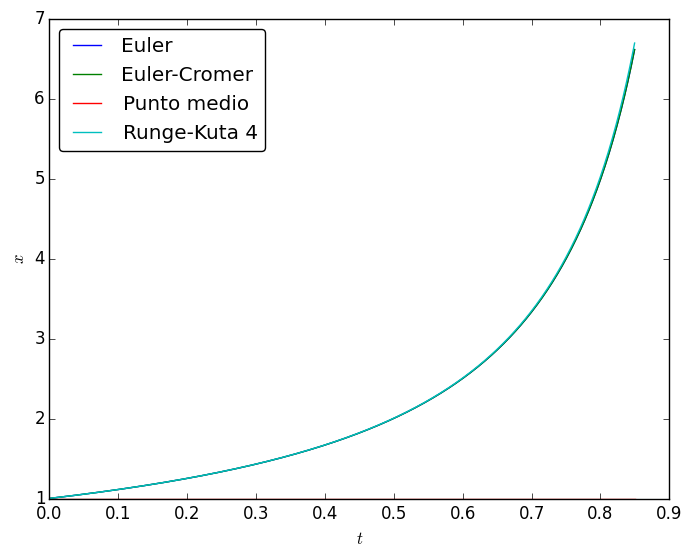

PyObject <matplotlib.legend.Legend object at 0x7fdedcd1db00>

In [20]:
plot(A1[:,1],A1[:,2],label=("Euler"));
plot(A2[:,1],A2[:,2],label=("Euler-Cromer"));
plot(A3[:,1],A3[:,2],label=("Punto medio"));
plot(A4[:,1],A4[:,2],label=("Runge-Kuta 4"));
xlabel(L"t")
ylabel(L"x")
legend(loc="upper left",fancybox="true")

###  Ejercicio 3: Integración con Taylor 

Repite los tres puntos del ejercicio anterior utilizando el método de integración de Taylor.

### Ejercicio 4: Recordatorio

> Memoria minuitur nisi eam exerceas — La memoria disminuye si no la ejercitas (Marco Tulio Cicerón).

Con tus palabras explica (sin utilizar muchas matemáticas) lo siguiente:

* La esencia del método de integración de Taylor.
* ¿Qué relación tiene con los duales?
* ¿Cómo elegimos el paso de avance en el método de Taylor?
* ¿Se pueden integrar sistemas de ecuaciones con este método? ¿Por qué?